# ============================================================
# AI-Powered E-Commerce Analytics Platform
# Data Analysis, Cleaning, and Machine Learning Pipeline
# Author: Pranuth
# ============================================================


# ================================
# 1. Import Libraries
# ================================

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

print("Libraries loaded successfully")

Libraries loaded successfully


## ================================
## 2. Load Dataset
## ================================

In [3]:
print("\nLoading dataset...")

data = pd.read_csv("data.csv", encoding='ISO-8859-1')

print("Dataset loaded successfully")

print("\nDataset shape:")
print(data.shape)

print("\nFirst 5 rows:")
print(data.head())


Loading dataset...
Dataset loaded successfully

Dataset shape:
(541909, 8)

First 5 rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


# ================================
# 3. Basic Information
# ================================

In [4]:
print("\nDataset Info:")
print(data.info())

print("\nMissing values:")
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

Missing values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


# ================================
# 4. Data Cleaning
# ================================

In [5]:
print("\nCleaning data...")

# Remove missing values
data = data.dropna()

# Remove negative quantities
data = data[data['Quantity'] > 0]

# Remove negative prices
data = data[data['UnitPrice'] > 0]

print("Data cleaned successfully")

print("\nNew dataset shape:")
print(data.shape)


Cleaning data...
Data cleaned successfully

New dataset shape:
(397884, 8)


# ================================
# 5. Feature Engineering
# ================================

In [6]:
print("\nCreating new features...")

# Convert date column
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Create TotalPrice
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Extract useful features
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day

print("Feature engineering completed")


Creating new features...
Feature engineering completed


# ================================
# 6. Exploratory Data Analysis (EDA)
# ================================

In [7]:
print("\nPerforming Exploratory Data Analysis...")

# Total Revenue
total_revenue = data['TotalPrice'].sum()
print(f"\nTotal Revenue: ${total_revenue:,.2f}")

# Total Customers
total_customers = data['CustomerID'].nunique()
print(f"Total Customers: {total_customers}")

# Total Products
total_products = data['Description'].nunique()
print(f"Total Products: {total_products}")


Performing Exploratory Data Analysis...

Total Revenue: $8,911,407.90
Total Customers: 4338
Total Products: 3877


# ================================
# 7. Revenue by Country
# ================================

In [8]:
country_revenue = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

print("\nTop 10 Countries by Revenue:")
print(country_revenue.head(10))


Top 10 Countries by Revenue:
Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: TotalPrice, dtype: float64



# ================================
# 8. Top Customers Analysis
# ================================

In [9]:
customer_spending = data.groupby('CustomerID')['TotalPrice'].sum()

print("\nTop 10 Customers:")
print(customer_spending.sort_values(ascending=False).head(10))


Top 10 Customers:
CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: TotalPrice, dtype: float64


# ================================
# 9. Sales Trend Analysis
# ================================

In [10]:
daily_sales = data.groupby(data['InvoiceDate'].dt.date)['TotalPrice'].sum()

print("\nDaily Sales Sample:")
print(daily_sales.head())


Daily Sales Sample:
InvoiceDate
2010-12-01    46376.49
2010-12-02    47316.53
2010-12-03    23921.71
2010-12-05    31771.60
2010-12-06    31215.64
Name: TotalPrice, dtype: float64


# ================================
# 10. Visualization (EDA)
# ================================    


Generating visualizations...


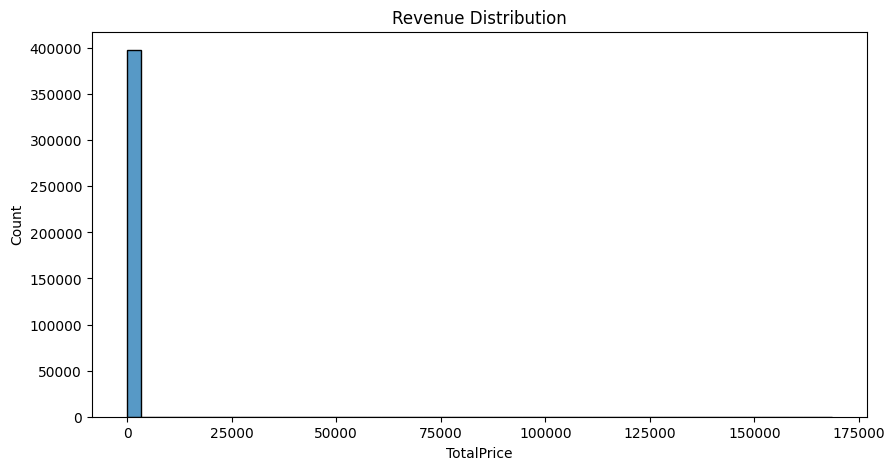

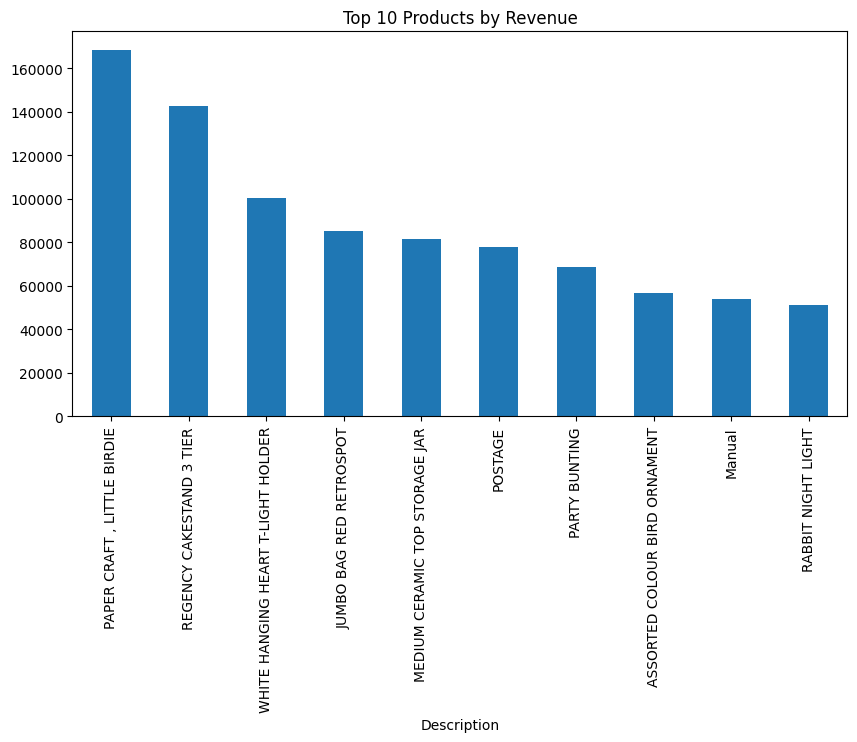

In [11]:
print("\nGenerating visualizations...")

# Revenue distribution
plt.figure(figsize=(10,5))
sns.histplot(data['TotalPrice'], bins=50)
plt.title("Revenue Distribution")
plt.show()

# Top 10 products
top_products = data.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Revenue")
plt.show()

# ================================
# 11. Prepare Data for Machine Learning
# ================================

In [12]:
print("\nPreparing data for Machine Learning...")

daily_sales = daily_sales.reset_index()

daily_sales['DayNumber'] = np.arange(len(daily_sales))

X = daily_sales[['DayNumber']]
y = daily_sales['TotalPrice']


Preparing data for Machine Learning...



# ================================
# 12. Train Machine Learning Model
# ================================

In [13]:

print("\nTraining Machine Learning model...")

model = LinearRegression()

model.fit(X, y)

print("Model trained successfully")


Training Machine Learning model...
Model trained successfully
